# Machine Learning for Fake News Prediction

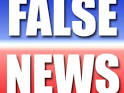

### DATASET DESCRIPTION

* title: the title of a news article
* text: the text of the article; could be incomplete
* subject: display the field of the news
* date: publish date

# IMPORTING NECESSARY LIBRARIES

In [1]:
import numpy as np            
import pandas as pd           

#for visualization of the data
import matplotlib.pyplot as plt 
import seaborn as sns

#to split train and test data set
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import TfidfVectorizer    

# for checking accuracy, precision, f1score, confusion matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
# regular expression
import re
# string manipulation
import string

# LOADING THE DATASET

In [2]:
true_data=pd.read_csv("True.csv")  
false_data = pd.read_csv("False.csv")  

In [3]:
true_data.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
false_data.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


# DATA PREPROCESSING

### ADDING TARGET ATTRIBUTE TO DATASET

In [5]:
true_data['class']=1
false_data['class']=0

In [6]:
true_data.head()

,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [7]:
false_data.head()

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [8]:
true_data.shape , false_data.shape

((21417, 5), (23481, 5))

### MERGING OF TRUE AND FALSE DATASET

In [9]:
data=pd.concat([true_data,false_data],axis=0)
data.head()

,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


### DROPPING UNWANTED COLUMNS

In [10]:
data.drop(['title','subject','date'],axis=1,inplace=True)

In [11]:
data.head()

,text,class
0,WASHINGTON (Reuters) - The head of a conservat...,1
1,WASHINGTON (Reuters) - Transgender people will...,1
2,WASHINGTON (Reuters) - The special counsel inv...,1
3,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,1


### CHECKING FOR NULL VALUES

In [12]:
data.isnull().sum()

text     0
class    0
dtype: int64

## RANDOM SHUFFLING THE DATAFRAME 

In [13]:
data=data.sample(frac=1)

In [14]:
data.head()

,text,class
5715,WASHINGTON (Reuters) - The U.S. Congress moved...,1
13509,There are no words for these selfish sub-human...,0
9001,Just days after forsaking her Stanford Cardina...,0
1061,In a move that will most likely never be descr...,0
21428,Roseberg residents and families of victims are...,0


In [15]:
data.reset_index(inplace = True)
data.head()

,index,text,class
0,5715,WASHINGTON (Reuters) - The U.S. Congress moved...,1
1,13509,There are no words for these selfish sub-human...,0
2,9001,Just days after forsaking her Stanford Cardina...,0
3,1061,In a move that will most likely never be descr...,0
4,21428,Roseberg residents and families of victims are...,0


In [16]:
data.drop(["index"], axis = 1, inplace = True)

In [17]:
data.head()

,text,class
0,WASHINGTON (Reuters) - The U.S. Congress moved...,1
1,There are no words for these selfish sub-human...,0
2,Just days after forsaking her Stanford Cardina...,0
3,In a move that will most likely never be descr...,0
4,Roseberg residents and families of victims are...,0


## FUNCTION TO PROCESS THE TEXTS

In [18]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [19]:
data['text']=data['text'].apply(wordopt)

# SPLITTING OF DATA

In [20]:
x=data['text']
y=data['class']

# TEXT TO VECTOR

In [21]:
tfv=TfidfVectorizer()
x=tfv.fit_transform(x)

### SPLITTING DATA TO TRAIN AND TEST DATA

In [22]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

# LOGISTIC REGRESSION

#### TRAINING THE MODEL

In [23]:
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression()
lr_model.fit(X_train,y_train)

LogisticRegression()

#### PREDICTION

In [24]:
y_pred_lr=lr_model.predict(X_test)

In [25]:
y_pred_lr

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [26]:
accuracy_score(y_pred_lr,y_test)

0.9870824053452116

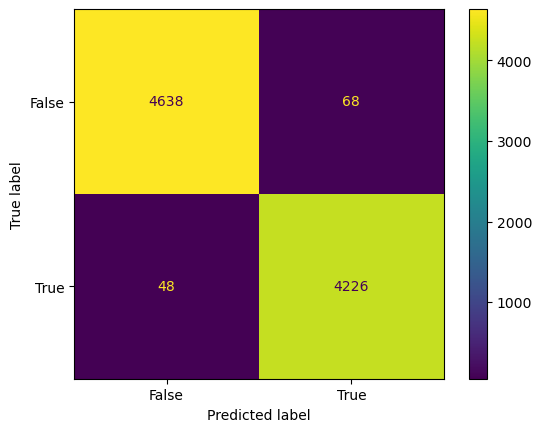

In [27]:
cm = confusion_matrix(y_test, y_pred_lr)
  
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True])
  
cm_display.plot()
plt.show()

In [28]:
print(classification_report(y_pred_lr,y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4686
           1       0.99      0.98      0.99      4294

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



# DECISION TREE CLASSIFIER

In [29]:
from sklearn.tree import DecisionTreeClassifier
dtc_model = DecisionTreeClassifier()
dtc_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [30]:
y_pred_dtc=dtc_model.predict(X_test)

In [31]:
y_pred_dtc

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [32]:
accuracy_score(y_pred_dtc,y_test)

0.995879732739421

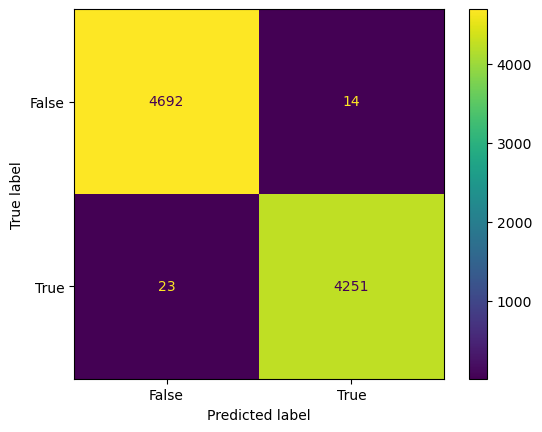

In [33]:
cm = confusion_matrix(y_test, y_pred_dtc)
  
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True])
  
cm_display.plot()
plt.show()

In [34]:
print(classification_report(y_pred_dtc,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4715
           1       0.99      1.00      1.00      4265

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



# RANDOM FOREST CLASSIFIER

In [35]:
from sklearn.ensemble import RandomForestClassifier
rfc_model= RandomForestClassifier(n_estimators=100,criterion='entropy')
rfc_model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy')

In [36]:
y_pred_rfc=rfc_model.predict(X_test)

In [37]:
y_pred_rfc

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [38]:
accuracy_score(y_test,y_pred_rfc)

0.9908685968819599

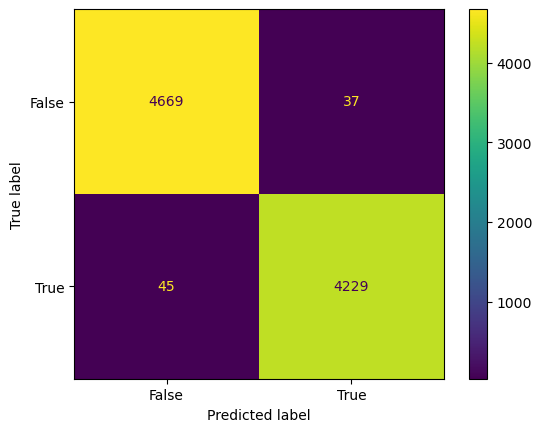

In [39]:
cm = confusion_matrix(y_test, y_pred_rfc)
  
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[False, True])
  
cm_display.plot()
plt.show()

In [40]:
print(classification_report(y_pred_rfc,y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4714
           1       0.99      0.99      0.99      4266

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



# Output

In [41]:
def checking_our_value():
    
    
    x=X_train[100]
    
    
    print('Logistic Regression:',output(lr_model.predict(x)))
    print('Random Forest Classifier:',output(rfc_model.predict(x)))
    print('Decision Tree Classifier:',output(dtc_model.predict(x)))
    
    
    
    
def output(n):
    
    if n==1:
        
        return 'True news'
        
    else:
         return 'False news'

In [42]:
checking_our_value()

Logistic Regression: True news
Random Forest Classifier: True news
Decision Tree Classifier: True news
